# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv(r"C:\Users\larsd\OneDrive - TU Eindhoven\Universiteit\Master Medical Engineering\Jaar 1\Kwartiel 1\Machine learning in MI and biology (8DM50)\8dm50-machine-learning-master\practicals/data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv(r"C:\Users\larsd\OneDrive - TU Eindhoven\Universiteit\Master Medical Engineering\Jaar 1\Kwartiel 1\Machine learning in MI and biology (8DM50)\8dm50-machine-learning-master\practicals/data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

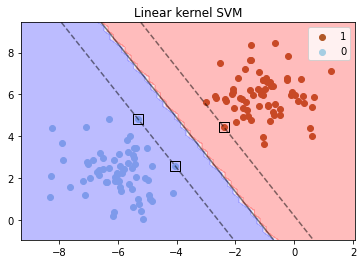

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

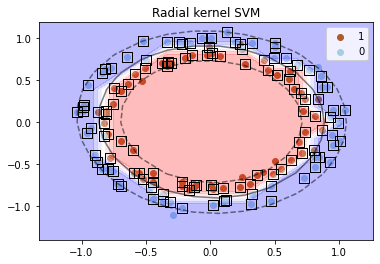

In [6]:
# build the model
model = svm.SVC(kernel='rbf', gamma=0.5, random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 0.3, X_train.iloc[:, 0].max() + 0.3
x2_min, x2_max = X_train.iloc[:, 1].min() - 0.3, X_train.iloc[:, 1].max() + 0.3

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

A RBF kernel should be used  the data is non linear and is therefore not linearly separable.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

SVM work by maximizing the distance between support vectors and a separating plane. In the case that the features are not scaled, features with large values will dominate features with low values when computing the distance. Therefore, feature-scaling ensures that all features influence the distance metric to the same extent. 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, test_size=0.25, random_state=42)

# Classify the data in the classes resistant and sensitive
y_train[y_train['YM155'] > 0] = 1 # resistant
y_train[y_train['YM155'] < 0] = 0 # sensitive
y_test[y_test['YM155'] > 0] = 1
y_test[y_test['YM155'] < 0] = 0

# Define pipeline and hyperparameter ranges
model = Pipeline([
                 ("scaler", StandardScaler()),
                 ("svm", svm.SVC())
                ])

kernels = ['rbf', 'sigmoid', 'poly', 'linear']
degrees = np.linspace(2, 6, 5)
Cs = [0.01, 0.1, 1, 10]
coefs0 = [0, 0.05, 0.1]
gammas = [0.001, 0.01, 0.1, 1]

parms = {'svm__kernel': kernels, 'svm__degree': degrees, 'svm__gamma':gammas, 'svm__C': Cs, 'svm__coef0': coefs0}

# Perform gridsearch of the hyperparameters
gscv = GridSearchCV(model, parms, cv = 10, scoring='neg_mean_squared_error')
gscv.fit(X_train.values,y_train)
results = gscv.cv_results_['mean_test_score']

# Predict the test set and calculate precision
y_true = y_test['YM155'].values
y_pred = np.around(gscv.predict(X_test))

# Precision = tp / (tp+fp)
tp = sum(y_pred * y_true)
fp = np.sum(np.logical_and(y_pred == 1, y_true == 0))
precision = tp / (tp+fp)
print("Precision: {:.2f}".format(precision))

report = classification_report(y_true, y_pred)
print(report)

# Evaluate best parameters
best_kernel = gscv.best_params_['svm__kernel']
best_degree = gscv.best_params_['svm__degree']
best_gamma = gscv.best_params_['svm__gamma']
best_C = gscv.best_params_['svm__C']
best_coef0 = gscv.best_params_['svm__coef0']
print("Optimal kernel: {}".format(best_kernel))
print("Optimal degree: {}".format(best_degree))
print("Optimal gamma: {}".format(best_gamma))
print("Optimal C: {}".format(best_C))
print("Optimal coef0: {}".format(best_coef0))

Precision: 0.57
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        29
         1.0       0.57      0.50      0.53         8

    accuracy                           0.81        37
   macro avg       0.72      0.70      0.71        37
weighted avg       0.80      0.81      0.81        37

Optimal kernel: linear
Optimal degree: 2.0
Optimal gamma: 0.001
Optimal C: 0.01
Optimal coef0: 0


<p><font color='#770a0a'>The calculated precision of 0.57 corresponds to the precision in the classification report of label 1. The precision in the classification report correponding to label 0 equals 0.87. The number of test samples with label 1 is quite low compared to test samples with label 0. 

The optimal degree equals 2, but this parameter is not relevant for the final model as a linear kernel is used. For the parameters gamma, C and coef0 the lowest values are chosen by GridSearch. As regularization is inversely correlated with the value of C, the low value of C means a high regularization. The low values of gamma and coef are not relevant, as they are not used in the linear kernel. 
</font></p>


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, test_size=0.25, random_state=42)

# Classify the data in the classes resistant and sensitive
y_train[y_train['YM155'] > 0] = 1 # resistant
y_train[y_train['YM155'] < 0] = 0 # sensitive
y_test[y_test['YM155'] > 0] = 1
y_test[y_test['YM155'] < 0] = 0

model = Pipeline([
                 ("scaler", StandardScaler()),
                 ("randomforest", RandomForestClassifier(bootstrap=True, oob_score=True))
                ])

n_estimators = [50, 100, 150, 200, 250]
depths = np.linspace(3, 19, 5)
features = ['sqrt', 'log2']
criterions = ['gini', 'entropy']
parms = {'randomforest__n_estimators': n_estimators, 'randomforest__max_depth': depths, 'randomforest__max_features': features,
        'randomforest__criterion': criterions}

# perform grid search of polynomial order
gscv = GridSearchCV(model, parms, cv = 10, scoring='neg_mean_squared_error')
gscv.fit(X_train.values,y_train)
results = gscv.cv_results_['mean_test_score']

y_true = y_test['YM155'].values
y_pred = np.around(gscv.predict(X_test))

# Precision = tp / (tp+fp)
tp = sum(y_pred * y_true)
fp = np.sum(np.logical_and(y_pred == 1, y_true == 0))
precision = tp / (tp+fp)
print("Precision: {:.2f}".format(precision))

report = classification_report(y_true, y_pred)
print(report)

# get best value of alpha
best_n_est = gscv.best_params_['randomforest__n_estimators']
best_depth = gscv.best_params_['randomforest__max_depth']
best_feature = gscv.best_params_['randomforest__max_features']
best_criterion = gscv.best_params_['randomforest__criterion']
print("Optimal # estimators: {}".format(best_n_est))
print("Optimal max depths: {}".format(best_depth))
print("Optimal criterion: {}".format(best_criterion))
print("Optimal features: {}".format(best_feature))

Precision: 0.50
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88        29
         1.0       0.50      0.12      0.20         8

    accuracy                           0.78        37
   macro avg       0.65      0.55      0.54        37
weighted avg       0.74      0.78      0.73        37

Optimal # estimators: 50
Optimal max depths: 15.0
Optimal criterion: gini
Optimal features: sqrt


<p><font color='#770a0a'>The SVM and RF model have a precision of respectively 0.57 and 0.50. Also for the precision for label 0, SVM (0.87) has a better perfomance than the RF model (0.80). This indicates that the SVM model has better performance compared to the RF model. Furthermore, the F1-score shows better performance for the SVM model. Definite conclusions cannot be drawn from the results as the test dataset used is rather small and the labels are not distributed symmetrically.
</font></p>

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

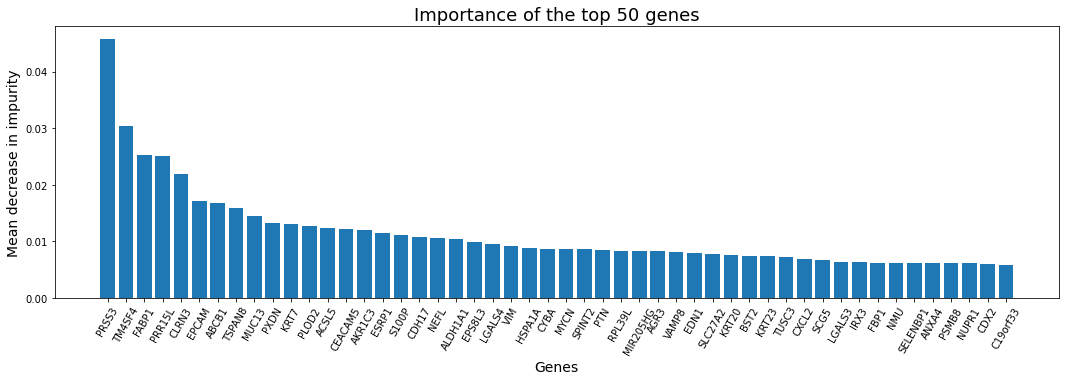

In [9]:
model.fit(X_train.values, y_train)

importances = pd.DataFrame(index=X_train.transpose().index)
importances['YM155'] = model['randomforest'].feature_importances_

# Filter the top 50 informative features
top50 = importances.sort_values(by=['YM155'], ascending=False)[0:50]
inds = top50.index.values
impts = list(top50['YM155'])

# Visualize feature importance of top 50 features
f, ax = plt.subplots(figsize=(18,5))
plt.bar(inds,impts)
plt.xticks(rotation=60)
plt.title('Importance of the top 50 genes', fontsize=18)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Mean decrease in impurity', fontsize=14)
plt.show()

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>
### Campbell et al. (2020) Pharmacologically informed machine learning approach for identifying pathological states of unconsciousness via resting-state fMRI. 

The goal of this paper was to evaluate whether three different machine learning models are able to make a binary distinction between conscious wakefulness and anesthetic-induced unconsciousness. Furthermore the ability to identify pathologically induced unconsciousness based on this binary distinction was investigated.

One type of machine learning model used in this paper is Extra Trees (ET) which is a variant of Random Forest. This model introduces additional randomness regarding the decision of split-points.

This model was used as it is popular and is successful in multi-variate neuroimaging applications. The inherent nature of Random Forests, in which predictions are aggregated with bagging, helps to minimize model variance and overfitting. Furthermore, ET offers good computational efficiency, compared to for example a deep learning model, it is easy to construct and has general reliability. Furthermore decision-tree based models, in general have to ability to perform analysis of feature importance. This has the added advantage to help to inform feature selection for future studies.